In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [2]:
data =  pd.read_csv('energy_clean.csv').drop('Unnamed: 0',axis=1)

print(data.head())

  PrimaryPropertyType Neighborhood  Latitude  Longitude  YearBuilt  \
0               Hotel     DOWNTOWN  47.61220 -122.33799       1927   
1               Hotel     DOWNTOWN  47.61317 -122.33393       1996   
2               Hotel     DOWNTOWN  47.61393 -122.33810       1969   
3               Hotel     DOWNTOWN  47.61412 -122.33664       1926   
4               Hotel     DOWNTOWN  47.61375 -122.34047       1980   

   NumberofBuildings  NumberofFloors  PropertyGFATotal  PropertyGFAParking  \
0                1.0              12             88434                   0   
1                1.0              11            103566               15064   
2                1.0              41            956110              196718   
3                1.0              10             61320                   0   
4                1.0              18            175580               62000   

   PropertyGFABuilding(s)  ...        Somme  Steamperc  Elecperc   Gasperc  \
0                   88434  ...  

Nous préparons les données pour le Machine Learning 

In [3]:
from sklearn.model_selection import train_test_split 

target = data['TotalGHGEmissions']


In [4]:
data.head()
list_suppr =list_suppr=['YearBuilt_cat',
            'TotalGHGEmissions','SteamUse(kBtu)',
            'Electricity(kBtu)','NaturalGas(kBtu)','SiteEnergyUse(kBtu)','SourceEUI(kBtu/sf)',
            'Somme','Steamperc','Elecperc','Gasperc','Encoded_cat_building_emission',
            'Encoded_cat_use_emission','Encoded_cat_building_energy','Encoded_cat_use_energy']
X  = data.drop(list_suppr,axis=1)
y =   data['TotalGHGEmissions']
X.columns

Index(['PrimaryPropertyType', 'Neighborhood', 'Latitude', 'Longitude',
       'YearBuilt', 'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal',
       'PropertyGFAParking', 'PropertyGFABuilding(s)',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA',
       'ENERGYSTARScore', 'Source_Cat'],
      dtype='object')

Nous séparons les données pour tester le model sur des données qu'il ne connait pas

In [5]:
from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test = train_test_split( X,y,test_size=0.3)
print(X_train.shape)
print(X_test.shape)

(1002, 18)
(430, 18)


In [6]:
X_train.head()

PrimaryPropertyType           Neighborhood  Latitude  Longitude  \
105            Mixed Use Property  MAGNOLIA / QUEEN ANNE  47.62390 -122.35756   
616                    University               DOWNTOWN  47.61679 -122.33619   
1181           Mixed Use Property                   EAST  47.61421 -122.31930   
748   Small- and Mid-Sized Office               DOWNTOWN  47.61185 -122.34340   
121                         Hotel               DOWNTOWN  47.61240 -122.35075   

      YearBuilt  NumberofBuildings  NumberofFloors  PropertyGFATotal  \
105        2002                1.0               4            110785   
616        1910                1.0               3             28800   
1181       1912                1.0               2             34914   
748        1918                1.0               3             38148   
121        1961                1.0               4            122309   

      PropertyGFAParking  PropertyGFABuilding(s) LargestPropertyUseType  \
105                    0                  110785    Multifamily Housing   
616                    0                   28800     College/University   
1181                   0                   34914           Retail Store   
748                    0                   38148                 Office   
121                    0                  122309                  Hotel   

      LargestPropertyUseTypeGFA SecondLargestPropertyUseType  \
105                     58563.0    Supermarket/Grocery Store   
616                     28800.0                         None   
1181                    14983.0                   Restaurant   
748                     37853.0                 Retail Store   
121                    122309.0                         None   

      SecondLargestPropertyUseTypeGFA ThirdLargestPropertyUseType  \
105                           48520.0                     Parking   
616                               0.0                        None   
1181                          10638.0                      Office   
748                           12495.0                        None   
121                               0.0                        None   

      ThirdLargestPropertyUseTypeGFA  ENERGYSTARScore        Source_Cat  
105                          29839.0              0.0  Electricity_only  
616                              0.0              0.0  Electricity_only  
1181                          5837.0              0.0  Electricity_only  
748                              0.0             98.0  Electricity_only  
121                              0.0              8.0               Gas

In [7]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import  mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder


def Rmse(y_test,y_pred):
    rmse=np.sqrt(mean_squared_error(y_test,y_pred))
    return rmse






Pour notre modélisation nous normalisons les données numériques et encodons les valeurs catégorielles

In [38]:
from sklearn import set_config
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.linear_model import LogisticRegression

set_config(display="diagram")

num_proc = make_pipeline( StandardScaler())

cat_proc = make_pipeline(
    
    OneHotEncoder(handle_unknown="ignore"),
)

preprocessor = make_column_transformer(
    (num_proc, ( 'Latitude', 'Longitude', 'YearBuilt',
       'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal',
       'PropertyGFAParking', 'PropertyGFABuilding(s)',
       'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseTypeGFA', 'ENERGYSTARScore')), 
    (cat_proc,('Source_Cat','Neighborhood','PrimaryPropertyType','LargestPropertyUseType',
               'SecondLargestPropertyUseType','ThirdLargestPropertyUseType')))




pipe_dummy = Pipeline(steps = [('prep',preprocessor),
                                ('dummy', DummyRegressor())])
pipe_dummy.fit(X_train,y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  ('Latitude', 'Longitude',
                                                   'YearBuilt',
                                                   'NumberofBuildings',
                                                   'NumberofFloors',
                                                   'PropertyGFATotal',
                                                   'PropertyGFAParking',
                                                   'PropertyGFABuilding(s)',
                                                   'LargestPropertyUseTypeGFA',
                                                   'SecondLargestPropertyUseTypeGFA',
                                                   'ThirdLargestPropertyUseTypeGFA',
                                                   'ENERGYSTARScore')),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ('Source_Cat', 'Neighborhood',
                                                   'PrimaryPropertyType',
                                                   'LargestPropertyUseType',
                                                   'SecondLargestPropertyUseType',
                                                   'ThirdLargestPropertyUseType'))])),
                ('dummy', DummyRegressor())])

Nous allons définir la modélisation la plus performante. Pour comparer nous allons tout d'abords faire une modélisation basique en utilisant le Dummyregressor puis une régression linéaire simple. Nous allons intéresser au score r2

In [9]:
from sklearn.dummy import DummyRegressor
pipe_dummy = Pipeline(steps = [('prep',preprocessor),
                                ('dummy', DummyRegressor())])
pipe_linear = Pipeline(steps = [('prep',preprocessor),
                                ('linear', LinearRegression())])
params_dummy = { 'dummy__strategy' : ['mean', 'median', 'quantile', 'constant']}
params_linear = { 'linear__fit_intercept':[True,False]}

grid_search_dummy = GridSearchCV(pipe_dummy,param_grid=params_dummy,cv=4,
                               scoring="r2",return_train_score=True)
grid_search_linear = GridSearchCV(pipe_linear,param_grid=params_linear,cv=4,
                               scoring="r2",return_train_score=True)

grid_search_dummy.fit(X_train,y_train)
grid_search_linear.fit(X_train,y_train)

Cv_dummy = pd.DataFrame(grid_search_dummy.cv_results_)
Cv_linear = pd.DataFrame(grid_search_linear.cv_results_)


/home/vortax/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
8 fits failed out of a total of 16.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
4 fits failed with the following error:
Traceback (most recent call last):
  File "/home/vortax/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/vortax/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/home/vortax/anaconda3/lib/python3.9/site-packages/sklearn/dummy.py", line 588, in fit
    raise ValueError(
ValueError: Quantile

Nous comparons avec la methode Ridge, Lasso puis le mélange des deux, l'ElasticNet

In [10]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Lasso

pipe_ridge = Pipeline(steps = [('prep',preprocessor),
                                ('ridge', Ridge())])
pipe_lasso =  Pipeline(steps = [('prep',preprocessor),
                                ('lasso', Lasso())])
pipe_elastic =  Pipeline(steps = [('prep',preprocessor),
                                ('elastic', ElasticNet())])
params_ridge = { 'ridge__alpha':[0.01 , 0.1 , 1]}
params_lasso = { 'lasso__alpha':[0.01 , 0.1 , 1]}
params_elastic = { 'elastic__alpha':[0.01 , 0.1 , 1]}

grid_search_ridge = GridSearchCV(pipe_ridge,param_grid=params_ridge,cv=4,
                               scoring="r2",return_train_score=True)

grid_search_lasso = GridSearchCV(pipe_lasso,param_grid=params_lasso,cv=4,
                               scoring="r2",return_train_score=True)

grid_search_elastic = GridSearchCV(pipe_elastic,param_grid=params_elastic,cv=4,
                               scoring="r2",return_train_score=True)

grid_search_ridge.fit(X_train,y_train)
grid_search_lasso.fit(X_train,y_train)
grid_search_elastic.fit(X_train,y_train)

Cv_ridge = pd.DataFrame(grid_search_ridge.cv_results_)
ridge_score = Cv_ridge.loc[grid_search_ridge.best_index_,['mean_train_score','mean_test_score']]

Cv_lasso = pd.DataFrame(grid_search_lasso.cv_results_)
lasso_score = Cv_lasso.loc[grid_search_lasso.best_index_,['mean_train_score','mean_test_score']]

Cv_elastic = pd.DataFrame(grid_search_elastic.cv_results_)
elastic_score = Cv_elastic.loc[grid_search_elastic.best_index_,['mean_train_score','mean_test_score']]

/home/vortax/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 42566.41891886294, tolerance: 26686.74246312882
  model = cd_fast.sparse_enet_coordinate_descent(
/home/vortax/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 462185.56600634754, tolerance: 18503.392196340825
  model = cd_fast.sparse_enet_coordinate_descent(
/home/vortax/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 273722.2027582377, tolerance: 28890.79738617371
  model = cd_fast.sparse_enet_coordinate_descent(
/home/vortax/anaconda3/lib/python3.9/site-packages/sklearn/lin

Par la suite nous testons les modèles non supervisés RandomForestRegressor puis GradientBoostingRegressor

In [11]:
pipe_forest = Pipeline(steps = [('prep',preprocessor),
                                ('clf', RandomForestRegressor(random_state=2))])
 


params = { 'clf__n_estimators':[2, 5,10,20]}

grid_search_clf = GridSearchCV(pipe_forest,param_grid=params,cv=4,
                               scoring="r2",return_train_score=True)
grid_search_clf.fit(X_train, y_train)


Cv_clf = pd.DataFrame(grid_search_clf.cv_results_)
Cv_clf

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.062845      0.002381         0.008487        0.000939   
1       0.136049      0.003581         0.009713        0.001263   
2       0.253396      0.004424         0.009793        0.000681   
3       0.496433      0.004997         0.011953        0.001442   

  param_clf__n_estimators                     params  split0_test_score  \
0                       2   {'clf__n_estimators': 2}           0.590325   
1                       5   {'clf__n_estimators': 5}           0.473152   
2                      10  {'clf__n_estimators': 10}           0.375434   
3                      20  {'clf__n_estimators': 20}           0.492781   

   split1_test_score  split2_test_score  split3_test_score  mean_test_score  \
0           0.410092          -0.994806           0.499298         0.126227   
1           0.620751          -1.736117           0.485562        -0.039163   
2           0.667399          -1.145983           0.440896         0.084437   
3           0.581626          -1.149456           0.585108         0.127515   

   std_test_score  rank_test_score  split0_train_score  split1_train_score  \
0        0.650358                2            0.589343            0.771710   
1        0.981445                4            0.786829            0.910809   
2        0.718596                3            0.840141            0.931043   
3        0.738188                1            0.903486            0.945891   

   split2_train_score  split3_train_score  mean_train_score  std_train_score  
0            0.941322            0.814708          0.779271         0.126141  
1            0.873185            0.898293          0.867279         0.048383  
2            0.898081            0.946919          0.904046         0.040885  
3            0.926174            0.961763          0.934328         0.021818

In [12]:
import xgboost as xgb

gbm_param_grid = {
    'gbm__colsample_bytree': [0.3, 0.7],
    'gbm__n_estimators': [10,20,50],
    'gbm__max_depth': [2,5,7]
}

gbm = Pipeline(steps = [('prep',preprocessor),
                                ('gbm', xgb.XGBRegressor())])

grid_mse = GridSearchCV(gbm,param_grid= gbm_param_grid,scoring
="r2",cv=4,verbose=1,return_train_score=True)



grid_mse.fit(X_train,y_train)

# Print the best parameters and lowest RMSE
print("Best parameters found: ", grid_mse.best_params_)
print("Lowest RMSE found: ", np.sqrt(np.abs(grid_mse.best_score_)))
Cv_xgb = pd.DataFrame(grid_mse.cv_results_)


Fitting 4 folds for each of 18 candidates, totalling 72 fits
Best parameters found:  {'gbm__colsample_bytree': 0.3, 'gbm__max_depth': 7, 'gbm__n_estimators': 50}
Lowest RMSE found:  0.788981979392903


In [13]:
xgb_score = Cv_xgb.loc[grid_mse.best_index_,['mean_train_score','mean_test_score']]
clf_score = Cv_clf.loc[grid_search_clf.best_index_,['mean_train_score','mean_test_score']]

Visualisons désormais les différentes performances, le premier sur le score moyen pour l'entrainant puis le test. Le second sur le temps d'entraînant puis de prédiction

In [14]:
Results_score = pd.DataFrame(columns=['mean_train_score','mean_test_score'],
                    index=['Dummy','Linear','Ridge','Lasso','ElasticNet','RandomForest','XgbBoost'])
Results_score.loc['Dummy'] = Cv_dummy.loc[grid_search_dummy.best_index_,['mean_train_score','mean_test_score']]
Results_score.loc['Linear'] = Cv_linear.loc[grid_search_linear.best_index_,['mean_train_score','mean_test_score']]
Results_score.loc['Ridge'] = Cv_ridge.loc[grid_search_ridge.best_index_,['mean_train_score','mean_test_score']]
Results_score.loc['Lasso'] = Cv_lasso.loc[grid_search_lasso.best_index_,['mean_train_score','mean_test_score']]
Results_score.loc['ElasticNet'] = Cv_elastic.loc[grid_search_elastic.best_index_,['mean_train_score','mean_test_score']]
Results_score.loc['RandomForest'] = Cv_clf.loc[grid_search_clf.best_index_,['mean_train_score','mean_test_score']]
Results_score.loc['XgbBoost'] = Cv_xgb.loc[grid_mse.best_index_,['mean_train_score','mean_test_score']]


In [15]:
Results_time = pd.DataFrame(columns=['mean_fit_time','mean_score_time'],
                    index=['Dummy','Linear','Ridge','Lasso','ElasticNet','RandomForest','XgbBoost'])
Results_time.loc['Dummy'] = Cv_dummy.loc[grid_search_dummy.best_index_,['mean_fit_time','mean_score_time']]
Results_time.loc['Linear'] = Cv_linear.loc[grid_search_linear.best_index_,['mean_fit_time','mean_score_time']]
Results_time.loc['Ridge'] = Cv_ridge.loc[grid_search_ridge.best_index_,['mean_fit_time','mean_score_time']]
Results_time.loc['Lasso'] = Cv_lasso.loc[grid_search_lasso.best_index_,['mean_fit_time','mean_score_time']]
Results_time.loc['ElasticNet'] = Cv_elastic.loc[grid_search_elastic.best_index_,['mean_fit_time','mean_score_time']]
Results_time.loc['RandomForest'] = Cv_clf.loc[grid_search_clf.best_index_,['mean_fit_time','mean_score_time']]
Results_time.loc['XgbBoost'] = Cv_xgb.loc[grid_mse.best_index_,['mean_fit_time','mean_score_time']]


<AxesSubplot:>

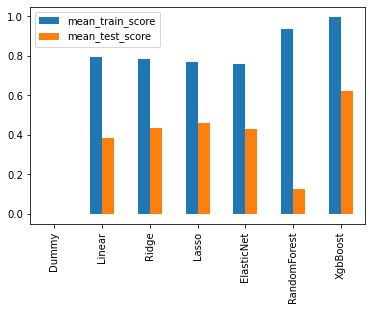

In [16]:
Results_score.plot.bar()


<AxesSubplot:>

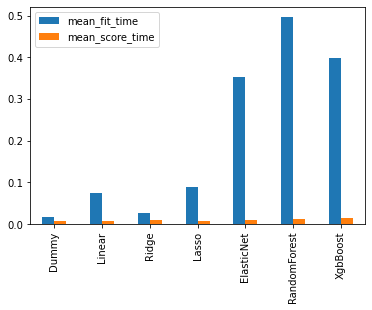

In [17]:
Results_time.plot.bar()

D'un point de vue performance, le XgbBoost est le meilleur, mais du point de vue temps, les autres modèles sont bien plus optimiaux. Ici nous ne nous limiterons pas au temps et selctionnerons ce modèle. Nous pouvons chercher à optimiser d'autant plus les hyperparamètres de notre modèle .

In [18]:
gbm_param_grid = {
    'gbm__learning_rate': [0.01, 0.1 , 1],
    'gbm__colsample_bytree': [0.3, 0.7,1],
    'gbm__n_estimators': [10,20,50,100],
    'gbm__max_depth': [2,5,7]
}

gbm = Pipeline(steps = [('prep',preprocessor),
                                ('gbm', xgb.XGBRegressor())])

grid_xgb = GridSearchCV(gbm,param_grid= gbm_param_grid,scoring
="r2",cv=4,verbose=1,return_train_score=True)



grid_xgb.fit(X_train,y_train)


Fitting 4 folds for each of 108 candidates, totalling 432 fits


GridSearchCV(cv=4,
             estimator=Pipeline(steps=[('prep',
                                        ColumnTransformer(transformers=[('pipeline-1',
                                                                         Pipeline(steps=[('standardscaler',
                                                                                          StandardScaler())]),
                                                                         ('Latitude',
                                                                          'Longitude',
                                                                          'YearBuilt',
                                                                          'NumberofBuildings',
                                                                          'NumberofFloors',
                                                                          'PropertyGFATotal',
                                                                          'PropertyGFAParking',
                                                                          'PropertyGFABuilding(s)',
                                                                          'LargestPropertyUseTypeGFA',
                                                                          'SecondLargestPropertyUseTypeGFA...
                                                     missing=nan,
                                                     monotone_constraints=None,
                                                     n_estimators=100,
                                                     n_jobs=None,
                                                     num_parallel_tree=None,
                                                     predictor=None,
                                                     random_state=None,
                                                     reg_alpha=None,
                                                     reg_lambda=None, ...))]),
             param_grid={'gbm__colsample_bytree': [0.3, 0.7, 1],
                         'gbm__learning_rate': [0.01, 0.1, 1],
                         'gbm__max_depth': [2, 5, 7],
                         'gbm__n_estimators': [10, 20, 50, 100]},
             return_train_score=True, scoring='r2', verbose=1)

In [83]:
hyperparam_score = pd.DataFrame(grid_xgb.cv_results_)
hyperparam_score['param'] = hyperparam_score.params.apply(lambda x : str(tuple(x.values())))
grid_xgb.best_params_

{'gbm__colsample_bytree': 0.3,
 'gbm__learning_rate': 1,
 'gbm__max_depth': 2,
 'gbm__n_estimators': 100}

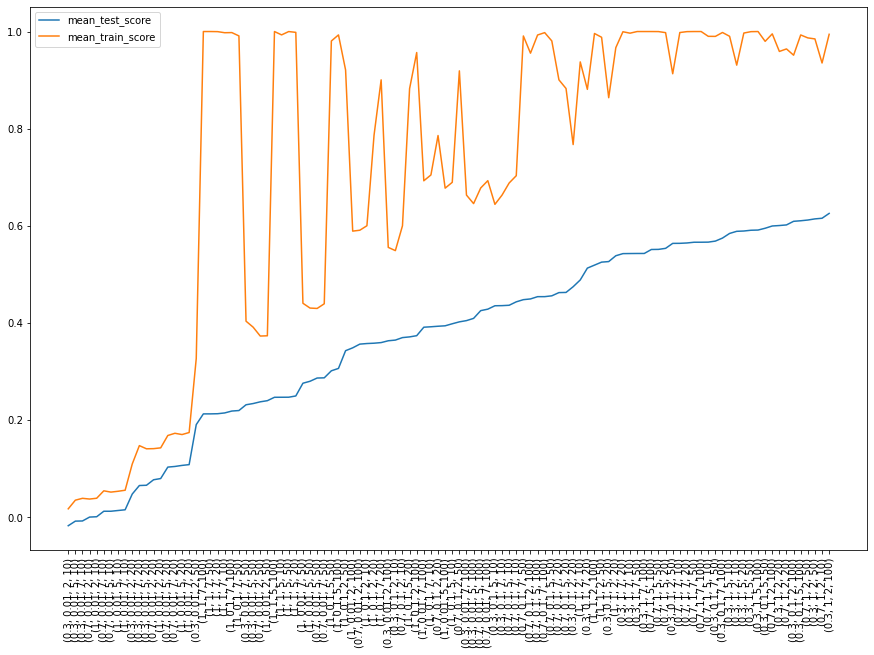

In [88]:
figure = plt.subplots(figsize=(15,10))
hyperparam_score = hyperparam_score.sort_values('mean_test_score')
plt.plot(hyperparam_score['param'],hyperparam_score['mean_test_score'],label='mean_test_score')
plt.plot(hyperparam_score['param'],hyperparam_score['mean_train_score'],label='mean_train_score')
plt.xticks(rotation=90)
plt.legend()
plt.show()

Nous avons sélectionné nos hyperparamètres , nous allons regarder l'importances de nos variables.

In [20]:
pipe_final = Pipeline(steps = [('prep',preprocessor),
                                ('gbm', xgb.XGBRegressor(colsample_bytree= 1,learning_rate = 0.1,
                                                         max_depth = 5, n_estimators =  100))])
pipe_final.fit(X_train,y_train)
pipe_final[1]

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [21]:
print('R2 is' , pipe_final.score(X_train,y_train))
print('Rmse is' , Rmse(pipe_final.predict(X_train),y_train))


R2 is 0.9915800088330695
Rmse is 53.84184315646728


In [23]:
from sklearn.inspection import permutation_importance
train_result = permutation_importance(
    pipe_final, X_train, y_train, n_repeats=10, random_state=42, n_jobs=2
)
test_results = permutation_importance(
    pipe_final, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)
sorted_importances_idx = train_result.importances_mean.argsort()

train_importances = pd.DataFrame(
    train_result.importances[sorted_importances_idx].T,
    columns=X.columns[sorted_importances_idx],
)
test_importances = pd.DataFrame(
    test_results.importances[sorted_importances_idx].T,
    columns=X.columns[sorted_importances_idx],
)

for name, importances in zip(["train", "test"], [train_importances, test_importances]):
    ax = importances.plot.box(vert=False, whis=10)
    ax.set_title(f"Permutation Importances ({name} set)")
    ax.set_xlabel("Decrease in accuracy score")
    ax.axvline(x=0, color="k", linestyle="--")
    ax.figure.tight_layout()



Nous voyons que le jeu d'entraînant ne permet pas de définir l'importance de la même façon qu'avec notre jeu de test. Nous sélectionnerons les variables suivantes : 
'Longitude', 'YearBuilt','NumberofBuildings', 'PropertyGFATotal', 'PropertyGFABuilding(s)',
'LargestPropertyUseTypeGFA','Source_Cat','PrimaryPropertyType','LargestPropertyUseType',
'ENERGYSTARScore'. Egalement nous allons voir la différnece sans l'EnergyStarScore.

In [24]:
preprocessor_red = make_column_transformer(
    (num_proc, ( 'Latitude', 'Longitude', 'YearBuilt',
       'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal',
       'PropertyGFAParking', 'PropertyGFABuilding(s)',
       'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseTypeGFA')), (cat_proc, ('Source_Cat','Neighborhood',
'PrimaryPropertyType','LargestPropertyUseType','SecondLargestPropertyUseType',
                                                       'ThirdLargestPropertyUseType'))
)

pipe_red_final = Pipeline(steps = [('prep',preprocessor_red),
                                ('gbm', xgb.XGBRegressor(colsample_bytree= 0.7, max_depth = 2, 
                                                         n_estimators =  50))])

X_red_train = X_train.drop('ENERGYSTARScore',axis=1)
pipe_red_final.fit(X_red_train,y_train)


Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  ('Latitude', 'Longitude',
                                                   'YearBuilt',
                                                   'NumberofBuildings',
                                                   'NumberofFloors',
                                                   'PropertyGFATotal',
                                                   'PropertyGFAParking',
                                                   'PropertyGFABuilding(s)',
                                                   'LargestPropertyUseTypeGFA',
                                                   'SecondLargestPropertyUseTypeGFA',
                                                   'ThirdLargestPropertyUseTy...
                              gamma=0, gpu_id=-1, grow_policy='depthwise',
                              importance_type=None, interaction_constraints='',
                              learning_rate=0.300000012, max_bin=256,
                              max_cat_to_onehot=4, max_delta_step=0,
                              max_depth=2, max_leaves=0, min_child_weight=1,
                              missing=nan, monotone_constraints='()',
                              n_estimators=50, n_jobs=0, num_parallel_tree=1,
                              predictor='auto', random_state=0, reg_alpha=0,
                              reg_lambda=1, ...))])

In [25]:
preprocessor_red_select = make_column_transformer(
    (num_proc, ( 'Longitude', 'YearBuilt',
       'NumberofBuildings', 'PropertyGFATotal', 'PropertyGFABuilding(s)',
       'LargestPropertyUseTypeGFA')), (cat_proc, ('Source_Cat','PrimaryPropertyType',
                                                       'LargestPropertyUseType'))
)

pipe_red_select_final = Pipeline(steps = [('prep',preprocessor_red_select),
                                ('gbm', xgb.XGBRegressor(colsample_bytree= 0.7, max_depth = 2, 
                                                         n_estimators =  50))])

X_red_select_train = X_train.drop(['ENERGYSTARScore', 'Latitude',
                            'NumberofFloors','Neighborhood','SecondLargestPropertyUseType',
                            'ThirdLargestPropertyUseType','SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseTypeGFA','PropertyGFAParking'],axis=1)
pipe_red_select_final.fit(X_red_select_train,y_train)


Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  ('Longitude', 'YearBuilt',
                                                   'NumberofBuildings',
                                                   'PropertyGFATotal',
                                                   'PropertyGFABuilding(s)',
                                                   'LargestPropertyUseTypeGFA')),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ('Source_Cat',
                                                   'Pri...
                              gamma=0, gpu_id=-1, grow_policy='depthwise',
                              importance_type=None, interaction_constraints='',
                              learning_rate=0.300000012, max_bin=256,
                              max_cat_to_onehot=4, max_delta_step=0,
                              max_depth=2, max_leaves=0, min_child_weight=1,
                              missing=nan, monotone_constraints='()',
                              n_estimators=50, n_jobs=0, num_parallel_tree=1,
                              predictor='auto', random_state=0, reg_alpha=0,
                              reg_lambda=1, ...))])

In [26]:
preprocessor_select = make_column_transformer(
    (num_proc, ( 'ENERGYSTARScore', 'Longitude', 'YearBuilt',
       'NumberofBuildings', 'PropertyGFATotal', 'PropertyGFABuilding(s)',
       'LargestPropertyUseTypeGFA')), (cat_proc, ('Source_Cat','PrimaryPropertyType',
                                                       'LargestPropertyUseType'))
)

pipe_select_final = Pipeline(steps = [('prep',preprocessor_select),
                                ('gbm', xgb.XGBRegressor(colsample_bytree= 0.7, max_depth = 2, 
                                                         n_estimators =  50))])

X_select_train = X_train.drop([ 'Latitude',
                            'NumberofFloors','Neighborhood','SecondLargestPropertyUseType',
                            'ThirdLargestPropertyUseType','SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseTypeGFA','PropertyGFAParking'],axis=1)
pipe_select_final.fit(X_select_train,y_train)


Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  ('ENERGYSTARScore',
                                                   'Longitude', 'YearBuilt',
                                                   'NumberofBuildings',
                                                   'PropertyGFATotal',
                                                   'PropertyGFABuilding(s)',
                                                   'LargestPropertyUseTypeGFA')),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),...
                              gamma=0, gpu_id=-1, grow_policy='depthwise',
                              importance_type=None, interaction_constraints='',
                              learning_rate=0.300000012, max_bin=256,
                              max_cat_to_onehot=4, max_delta_step=0,
                              max_depth=2, max_leaves=0, min_child_weight=1,
                              missing=nan, monotone_constraints='()',
                              n_estimators=50, n_jobs=0, num_parallel_tree=1,
                              predictor='auto', random_state=0, reg_alpha=0,
                              reg_lambda=1, ...))])

Nous visualisons le r2 et le rmse de notre modèle sur les différentes selection de variable.

In [84]:
figure,axes = plt.subplots(1,2,figsize=(10,5))
axes[0].bar(['All features','No_EnergyStarScore',
             'No_EnergyStarScore_selected_features','Selected_features'],
            [pipe_final.score(X_train,y_train),
             pipe_red_final.score(X_red_train,y_train),
             pipe_red_select_final.score(X_red_select_train,y_train),
             pipe_select_final.score(X_select_train,y_train)             
            ])
axes[1].bar(['All features','No_EnergyStarScore',
             'No_EnergyStarScore_selected_features','Selected_features'],
            [Rmse(pipe_final.predict(X_train),y_train),
             Rmse(pipe_red_final.predict(X_train),y_train),
             Rmse(pipe_red_select_final.predict(X_red_select_train),y_train),
             Rmse(pipe_select_final.predict(X_select_train),y_train)
            ])
axes[0].tick_params(rotation=90)
axes[1].tick_params(rotation=90)


Nous voyons que l'EnergyStarScore minimise l'erreur moyenne et donne un meilleur r2.La même chose se passe ne réduisant le nombre de variable. Par contre, le changelent ne semble pas très significatif lorsque nous enlevons l'EnergyStarScore de nos variables sélectionnées.
Regardons comment évolue notre erreur en fonction de  'PrimaryPropertyType','Neighborhood',
'LargestPropertyUseType','Source_Cat'.

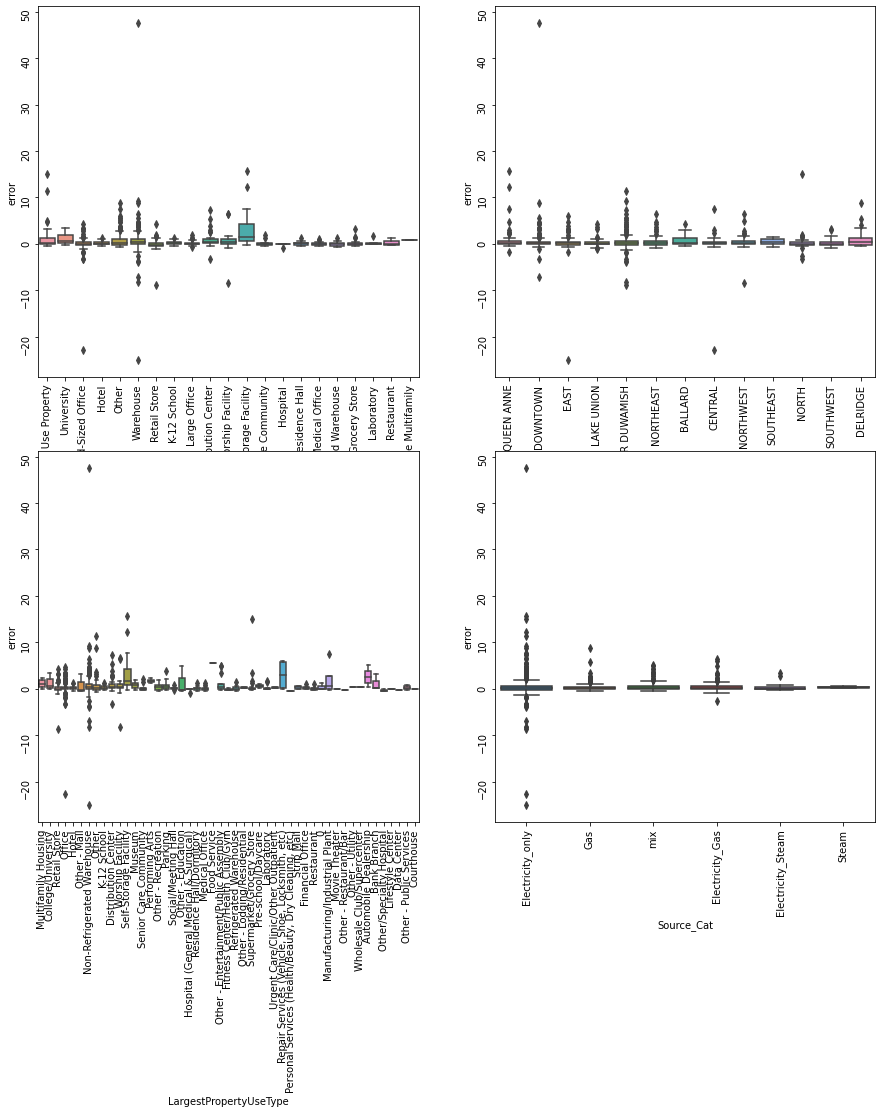

In [28]:
figure,axes = plt.subplots(2,2,figsize=(15,15))
y_pred = pipe_final.predict(X_train)
data_error =X_train.copy()
data_error['error'] = (y_pred - y_train)/y_train
sns.boxplot(data=data_error,y='error',x='PrimaryPropertyType',ax=axes[0,0])
sns.boxplot(data = data_error , y='error',x = 'Neighborhood',ax=axes[0,1])

sns.boxplot(data=data_error,y='error',x='LargestPropertyUseType',ax=axes[1,0])
sns.boxplot(data = data_error , y='error',x = 'Source_Cat',ax=axes[1,1])

axes[0,0].tick_params(rotation=90)
axes[0,1].tick_params(rotation=90)
axes[1,0].tick_params(rotation=90)
axes[1,1].tick_params(rotation=90)

plt.show()

Nous voyons que certainnes catégories ont une marge d'erreur plus importante que les autres. Nous pouvons rajouter un facteur d'erreur manuellementpour compenser cela. Testons notre modèle final

In [29]:
r2_final = pipe_final.score(X_test,y_test)
rmse_final = Rmse(pipe_final.predict(X_test),y_test)

print('r2 is',r2_final)
print('Rmse is',rmse_final)

r2 is 0.677134071339243
Rmse is 341.0211963453611
